I'd like my final view to include the position locations on each prediction of my position in the room.
Instead of drawing that over a random single image of the room I'd like to see what an "average image" of the room looks like (in reasonable daylight hours, while I'm not there).

In [103]:
import os
import json
import random

In [104]:
OUTPUT_DIR = 'outputs'

outputFiles = sorted(list(map(
    lambda x: f'{OUTPUT_DIR}/{x}',
    filter(
        lambda x: x.endswith('.json'),
        os.listdir(OUTPUT_DIR),
    )
)))

In [105]:
outputFiles[:10]

['outputs/2025-06-21T14-21-53.json',
 'outputs/2025-06-21T14-21-57.json',
 'outputs/2025-06-21T14-22-01.json',
 'outputs/2025-06-21T14-22-05.json',
 'outputs/2025-06-21T14-22-09.json',
 'outputs/2025-06-21T14-22-13.json',
 'outputs/2025-06-21T14-22-17.json',
 'outputs/2025-06-21T14-22-21.json',
 'outputs/2025-06-21T14-22-25.json',
 'outputs/2025-06-21T14-22-29.json']

In [106]:
# Randomly select images with zero people in them
N = 2_000
samples = outputFiles.copy()
random.shuffle(outputFiles)

keep = []
for fpath in samples:
    if len(keep) >= N:
        break

    with open(fpath) as file:
        data = json.load(file)
    
    if 'skipped' in data:
        continue

    # print(json.dumps(data, indent=2))
    if type(data) == list:
        data = data[0]
    
    if 'person_count' in data:
        if data['person_count'] < 1.0:
            data['path'] = fpath.replace('outputs', 'images').replace('json', 'jpg')
            keep.append(data)

print(len(keep))

2000


In [107]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [108]:
# Filter for reasonable hour and enough visual variety (not totally dark)
diverse = []
for item in keep:
    img = cv2.cvtColor(
        cv2.imread(item['path']),
        cv2.COLOR_BGR2RGB
    )
    std = img.std()
    
    hour = int(item['path'].split('T')[1].split('-')[0])
    
    if std > 50 and hour > 10 and hour < 16:
        diverse.append(item)
        # print(item['path'], std)

images/2025-06-21T14-22-29.jpg


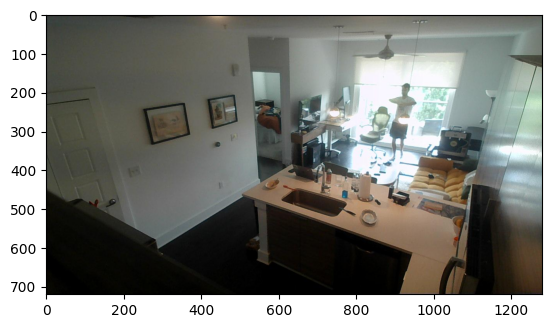

In [109]:
# Test image just to check
print(diverse[0]['path'])
img = cv2.cvtColor(
    cv2.imread(diverse[0]['path']),
    cv2.COLOR_BGR2RGB
)
plt.imshow(img)
plt.show()

In [110]:
# Get the mean of all selected images
allImages = [
    cv2.cvtColor(
        cv2.imread(item['path']),
        cv2.COLOR_BGR2RGB
    )
    for item in diverse
]
print(len(allImages))
allImages = np.mean(allImages, axis=0).astype(np.uint8)
print(allImages.shape)

472
(720, 1280, 3)


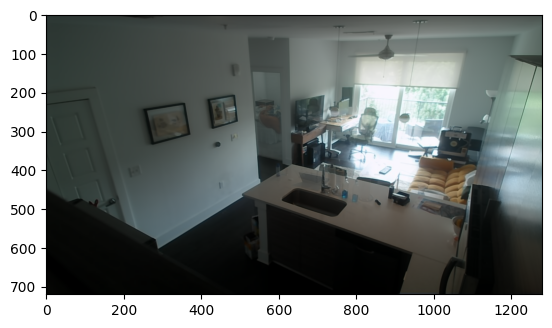

In [111]:
plt.imshow(allImages)
plt.show()

In [112]:
# Save the image
image_bgr = cv2.cvtColor(allImages, cv2.COLOR_RGB2BGR)
cv2.imwrite('average_apt_image.png', image_bgr)
print('WROTE IMAGE!')

WROTE IMAGE!
